##Linear Regression using TensorFlow

In this session, we will have a look at creating a linear regression model using tensorflow 2.0. Note that we already know the basics of linear regression and understand the implementation through sklearn. We will try to figure out how to do it using tensorflow tools that we have learnt.   


<i>Note that to keep this exercise simple and focused on tensorflow and its relevant functions, we will make a very simple model with very basic preprocessing.</i> 

#### Let us start with mounting our drive to be able to use the dataset stored in our dataset.

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#### Now, let us install the latest version of tensorflow.


In [ ]:
#!pip install tensorflow==2.0.0
#!pip install -q keras

##### Check the version of the installation

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
# Google Collab Functions
# Test GPU Running
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 666804861534855704, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14638920512
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7003233804855065747
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
! cat /proc/meminfo

MemTotal:       13333596 kB
MemFree:         9044272 kB
MemAvailable:   11871988 kB
Buffers:           91408 kB
Cached:          2771652 kB
SwapCached:            0 kB
Active:          1285804 kB
Inactive:        2585440 kB
Active(anon):     862224 kB
Inactive(anon):     8568 kB
Active(file):     423580 kB
Inactive(file):  2576872 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              5704 kB
Writeback:             0 kB
AnonPages:       1008308 kB
Mapped:           583164 kB
Shmem:              9256 kB
Slab:             184680 kB
SReclaimable:     135944 kB
SUnreclaim:        48736 kB
KernelStack:        5120 kB
PageTables:         9216 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666796 kB
Committed_AS:    4020208 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:             1048 kB
AnonHugePages:   

In [ ]:
! cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

Now Let us import out data and get it ready for modelling.

In [ ]:
import pandas as pd
import numpy as np

cars_data = pd.read_csv('/content/drive/My Drive/GL_Mentor/Data/usedcars.csv')
cars_data

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO
...,...,...,...,...,...,...
145,2006,SES,6200,95000,Silver,AUTO
146,2002,SE,5995,87003,Red,AUTO
147,2000,SE,5980,96841,Red,AUTO
148,2001,SE,4899,151479,Yellow,AUTO


In [ ]:
cars_data.isna().sum()

year            0
model           0
price           0
mileage         0
color           0
transmission    0
dtype: int64

In [ ]:
#just some basic preprocessing
cars_data.drop_duplicates()
#creating dummy variables for the categorical features
cars_data = pd.get_dummies(cars_data)
cars_data = cars_data.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
cars_data


,year,price,mileage,model_SE,model_SEL,model_SES,color_Black,color_Blue,color_Gold,color_Gray,color_Green,color_Red,color_Silver,color_White,color_Yellow,transmission_AUTO,transmission_MANUAL
0,2011.0,21992.0,7413.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2011.0,20995.0,10926.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2011.0,19995.0,7351.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2011.0,17809.0,11613.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2012.0,17500.0,8367.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2006.0,6200.0,95000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
146,2002.0,5995.0,87003.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
147,2000.0,5980.0,96841.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
148,2001.0,4899.0,151479.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
#explorinfg column names
cars_data.columns

Index(['year', 'price', 'mileage', 'model_SE', 'model_SEL', 'model_SES',
       'color_Black', 'color_Blue', 'color_Gold', 'color_Gray', 'color_Green',
       'color_Red', 'color_Silver', 'color_White', 'color_Yellow',
       'transmission_AUTO', 'transmission_MANUAL'],
      dtype='object')

In [ ]:
#getting the features and labels and finally splitting the test and train data.
from sklearn.model_selection import train_test_split
X = cars_data[['year','mileage', 'model_SE', 'model_SEL', 'model_SES',
       'color_Black', 'color_Blue', 'color_Gold', 'color_Gray', 'color_Green',
       'color_Red', 'color_Silver', 'color_White', 'color_Yellow',
       'transmission_AUTO', 'transmission_MANUAL']]
Y = cars_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

#let us scale the data as features are on different scales which might be a problem while modelling
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
# MinMaxScalar has been used here. You can go ahead and use the other scalars available and chcek the effect on the results.
#fitting the transform on test and train separately
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.75      , 0.27928138, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.58332825, 0.5233474 , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.75      , 0.21721278, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.83332825, 0.20944397, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33332825, 0.6878496 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.83332825, 0.2253431 , 1.        , ..., 0.        , 1.        ,
        0.        ]], dtype=float32)

In [ ]:

# let us now convert the data elements into tensors as we need tensors to be fed into different tensorflow based operations
#X-train and X_test were converted to numpy arrays while transformations while the other two need to be transformed into numpy arrays.
X_train=tf.convert_to_tensor(X_train)
y_train=tf.convert_to_tensor(y_train.values)
X_test=tf.convert_to_tensor(X_test)
y_test=tf.convert_to_tensor(y_test.values)

In [ ]:
X_train.shape

TensorShape([120, 16])

#### Let us try modelling now. We will use a few concepts covered in the practice exercise shared with the course material.

In [ ]:
input_dim = X_train.shape[1]
output_dim = 1
learning_rate = 0.01
# Decay with learning rate; 

In [ ]:
# Let us initialize the weights and bias variables. 
#weights = tf.Variable(tf.zeros(shape=(input_dim, output_dim), dtype= tf.float32))
weights = tf.Variable(tf.random.normal([16,1], 0, 1, tf.float32, seed=1))
weights
# Initialize weights

<tf.Variable 'Variable:0' shape=(16, 1) dtype=float32, numpy=
array([[-0.8113182 ],
       [ 1.4845988 ],
       [ 0.06532937],
       [-2.4427042 ],
       [ 0.0992484 ],
       [ 0.5912243 ],
       [ 0.59282297],
       [-2.1229296 ],
       [-0.72289723],
       [-0.05627037],
       [ 0.6435448 ],
       [-0.26432407],
       [ 1.8566332 ],
       [ 0.5678417 ],
       [-0.3828359 ],
       [-1.4853433 ]], dtype=float32)>

In [ ]:
bias = tf.Variable(tf.random.uniform(shape=(output_dim,), dtype= tf.float32, minval=5, maxval=10))
#bias = tf.Variable(tf.ones(shape=(output_dim,), dtype= tf.float32))
bias.shape

TensorShape([1])

In [ ]:
def predict(features):
  return tf.matmul(features, weights) + bias # note that the matmul is matrix multiplication and is needed for calculating predictions
# mx + b

In [ ]:
def compute_loss(y_true, predictions):
  return tf.reduce_mean(tf.square(y_true - predictions)) # mean square error
# mean of values, reduce to single value, 
# Loss - (y - y')^2

In [ ]:
x = tf.Variable(3.0, trainable=True)
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [ ]:
# Example use case for Gradient Tape
with tf.GradientTape() as tape1:
    with tf.GradientTape() as tape2:
        y = x ** 3
    order_1 = tape2.gradient(y, x)
order_2 = tape1.gradient(order_1, x)

print(order_2.numpy()) # -> 18.0

18.0


In [ ]:
def train(x, y):
  with tf.GradientTape() as tape:  # Keep track of operations on Forward Prop
    predictions = predict(x)  # Make predictions 
    loss = compute_loss(y, predictions) # Calculate Loss Function
  dloss_dw, dloss_db = tape.gradient(loss, [weights, bias]) #note that we can pass lists as well here. Calculate gradients for back propogation
  weights.assign_sub(learning_rate * dloss_dw) # update weights by learning rate * derivative of Loss Functions based on Chain Differentiation
  bias.assign_sub(learning_rate * dloss_db) # update bias by learning rate * derivative of loss functions based on Chain Differentiation
  return loss
# Single NN with 16 inputs

#### Let us now, call the train function with 50 epochs

In [ ]:
for epoch in range(100):
  loss = train(X_train, y_train)
  print('Epoch %d: Loss = %.4f' % (epoch, float(loss)))


print('Final Weights after 50 epochs:')
print('###############################################################################')
print(weights)

print('Final Bias after 50 epochs:')
print('###############################################################################')
print(bias)
# With epochs loss goes down 

Epoch 0: Loss = 36487204.0000
Epoch 1: Loss = 33786920.0000
Epoch 2: Loss = 31393374.0000
Epoch 3: Loss = 29271532.0000
Epoch 4: Loss = 27390370.0000
Epoch 5: Loss = 25722406.0000
Epoch 6: Loss = 24243304.0000
Epoch 7: Loss = 22931492.0000
Epoch 8: Loss = 21767880.0000
Epoch 9: Loss = 20735550.0000
Epoch 10: Loss = 19819510.0000
Epoch 11: Loss = 19006496.0000
Epoch 12: Loss = 18284748.0000
Epoch 13: Loss = 17643856.0000
Epoch 14: Loss = 17074590.0000
Epoch 15: Loss = 16568784.0000
Epoch 16: Loss = 16119196.0000
Epoch 17: Loss = 15719424.0000
Epoch 18: Loss = 15363782.0000
Epoch 19: Loss = 15047244.0000
Epoch 20: Loss = 14765354.0000
Epoch 21: Loss = 14514165.0000
Epoch 22: Loss = 14290184.0000
Epoch 23: Loss = 14090311.0000
Epoch 24: Loss = 13911807.0000
Epoch 25: Loss = 13752238.0000
Epoch 26: Loss = 13609458.0000
Epoch 27: Loss = 13481556.0000
Epoch 28: Loss = 13366845.0000
Epoch 29: Loss = 13263826.0000
Epoch 30: Loss = 13171181.0000
Epoch 31: Loss = 13087730.0000
Epoch 32: Loss = 1

#### Let us now test our model on the test data and predict on the test data.

In [ ]:
test_predictions = tf.matmul(X_test, weights) + bias
print(compute_loss(y_test, test_predictions))

tf.Tensor(8548509.0, shape=(), dtype=float32)


We learnt creating a very simple linear regression model on cars data and predicted prices. 

Though, we could have done an extensive EDA and further improved the model but we have focused on tensorflow and its operations.

<i>Happy Learning!</i>

In [1]:
### Use Tensflow Keras to run a Simple Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

ncols = X_train.shape[1]

# Initialize the constructor
model = Sequential()
model.add(Dense(16, input_dim=ncols, activation='relu'))
# Add an first hidden layer 
model.add(Dense(20, activation='relu', kernel_initializer='normal'))

# Add an output layer with one neuron and no activation specified
model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(0.01)


model.compile(loss='mean_squared_error',
              optimizer=optimizer , metrics = ['mae' , 'mse'])
                   

epochs = 100
# NN with Input layer and hidden layer with 20 neurons

In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, validation_split = 0.2, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

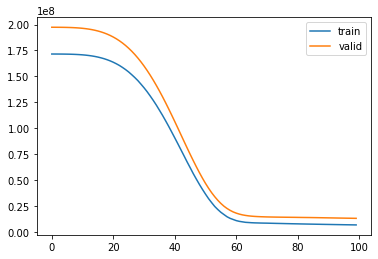

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist['mse'])
plt.plot(hist['val_mse'])
plt.legend(("train" , "valid") , loc =0)

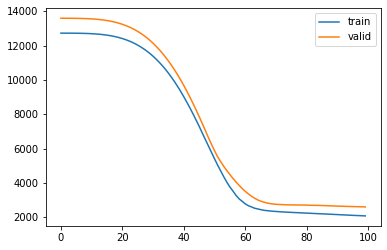

In [ ]:
plt.plot(hist['mae'])
plt.plot(hist['val_mae'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
loss = model.evaluate(X_test, y_test, verbose=False)

In [ ]:
y_pred = np.round(model.predict(X_test))

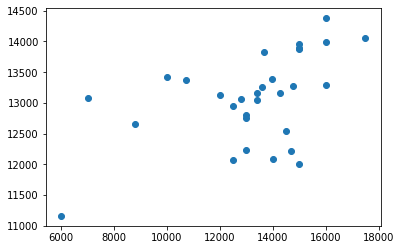

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)